# Nettoyage des données

1. Traitement des valeurs aberrantes
2. Traitement des valeurs manquantes

In [1]:
import pandas as pd
# import lux

# lux.config.sampling = False
#lux.config.plotting_backend = "matplotlib"

datas = pd.read_csv("PSante_02_app_products.csv", encoding="utf-8")
datas

,product_name,brands,origins,manufacturing_places,purchase_places,countries,nutriscore_grade,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
0,Nectar d'abricot,Ferme de l'Aiguemarse,NaN,bénivay-ollon,France,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Naturablue original,Natura4Ever,NaN,France,France,France,NaN,0.0,0.00,NaN,0.00,NaN,NaN
2,Blanquette de Volaille et son Riz,Comme J’aime,France,France,France,France,b,450.0,0.90,0.50,6.80,0.28000,0.0
3,Salade Cesar,Kirkland Signature,Québec,Brossard Québec,NaN,Canada,c,1210.0,7.00,2.00,22.00,0.86400,6.0
4,Danoises à la cannelle roulées,Kirkland Signature,Québec,Brossard Québec,Brossard Québec,Canada,NaN,1520.0,NaN,2.05,4.79,0.36900,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116263,Tomate côtelée,"Primora, Balance",Espagne,Almeria,France,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116264,pain batard cereales,super u,NaN,france,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116265,raviolis pekinois surgelés,asia food,Hongrie,Hongrie,France,en:France,NaN,3883.0,3.79,NaN,NaN,0.41656,NaN
116266,cup noodles,nissin,NaN,Hongrie,France,France,NaN,351.0,2.00,0.00,1.80,0.40000,NaN


In [2]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116268 entries, 0 to 116267
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             115156 non-null  object 
 1   brands                   114762 non-null  object 
 2   origins                  50038 non-null   object 
 3   manufacturing_places     116268 non-null  object 
 4   purchase_places          86630 non-null   object 
 5   countries                115934 non-null  object 
 6   nutriscore_grade         86336 non-null   object 
 7   energy_100g              96781 non-null   float64
 8   saturated-fat_100g       94155 non-null   float64
 9   fiber_100g               52738 non-null   float64
 10  proteins_100g            96984 non-null   float64
 11  sodium_100g              95613 non-null   float64
 12  nutrition-score-fr_100g  86338 non-null   float64
dtypes: float64(6), object(7)
memory usage: 11.5+ MB


Je vais maintenant traiter les valeurs aberrantes

Variables qualitatives:

* Product_name, brands, origins, manufacturing_places, purchase_places et countries sont des variables nominales, je ne trouverai pas d'outliers dedans
* nutriscore_grade est une variable ordinale  qui ne peut prendre que a, b, c, d, e comme valeurs. Je vais vérifier qu'il n'y en ait pas d'autres

Variables quantitatives:

Elles ne peuvent être inférieure à 0 sauf nutrition-score-fr_100g qui est compris entre -15 et 40 inclus
* energy_100g, je vais considérer les outliers <0 et >Q3 + 1.5*IQ
* saturated-fat_100g, fiber_100g, proteins_100g et sodium_100g, les valeurs doivent comprises entre 0 et 100 inclus
* nutrition-score-fr_100g, selon le référentiel officiel le meilleur score est -15 et le pire 40. Les valeurs doivent donc être comprises entre ces deux bornes

J'ai décidé de supprimer les outliers


In [3]:
import matplotlib.pyplot as plt

#datas.boxplot(column="nutriscore_grade", vert=False)
#plt.show()

length = len(datas.index)

In [4]:
# nutriscore_grade
score_values = datas["nutriscore_grade"].value_counts()

import re
outlier = []
count = 0

for score in score_values.index:
    result = re.findall(r"[a-eA-E]", score)
    if len(result) == 0:
        outlier.append([score, score_values[count]])
    count += 1

if len(outlier) > 0:
    print("Outliers:\n")
    print(outlier)
else:
    print("Il n'y a pas d'outliers")


Il n'y a pas d'outliers


In [5]:
# Outliers pour variables quantitatives

def get_outliers(datas, column, inf, sup):

    length = len(datas.index)
    outlier_inf = []
    outlier_sup = []

    for val in datas[column]:
        if val < inf:
            outlier_inf.append(val)
        if val > sup:
            outlier_sup.append(val)
    
    if len(outlier_inf) > 0 or len(outlier_sup) > 0:
        print(f"Borne inf: {inf}, borne sup: {sup}")
        print(f"Il y a {len(outlier_inf) + len(outlier_sup)} / {length} outliers pour {column}")
        if len(outlier_inf) > 0:
            print(f"\nOutlier < {inf}:")
            print(f"Il y a {len(outlier_inf)} allant de {min(outlier_inf)} à {max(outlier_inf)}")
        if len(outlier_sup) > 0:
            print(f"\nOutlier > {sup}:")
            print(f"Il y a {len(outlier_sup)} allant de {min(outlier_sup)} à {max(outlier_sup)}")

        datas = datas[((datas[column] >= inf) & (datas[column] <= sup)) | (datas[column].isnull() == True)].reset_index(drop=True)
        # .info() pour vérifier que le tri a bien été effectué
        # print(datas.info())
    else:
        print(f"Il n'y a pas d'outliers")

    return datas

In [6]:
# Choix entre méthode inter-quartile et moy + x * std

Q1 = datas["energy_100g"].quantile(q=0.25)
Q3 = datas["energy_100g"].quantile(q=0.75)
moustache_sup = Q3 + 1.5 * (Q3 - Q1)

moy = datas["energy_100g"].mean(skipna=True)
std = datas["energy_100g"].std(skipna=True)
anomalie_sup1 = moy + std
anomalie_sup2 = moy + 2 * std
anomalie_sup3 = moy + 3 * std

print(f"Valeur sup inter-quartile: {moustache_sup}")
print(f"Valeur sup 1 écart-type: {anomalie_sup1}")
print(f"Valeur sup 2 écart-type: {anomalie_sup2}")
print(f"Valeur sup 3 écart-type: {anomalie_sup3}")

Valeur sup inter-quartile: 3400.5
Valeur sup 1 écart-type: 40446.4238092402
Valeur sup 2 écart-type: 79673.50788783576
Valeur sup 3 écart-type: 118900.59196643131


Selon https://sante.journaldesfemmes.fr/calories/classement/aliments/calories, l'aliment le plus calorique fait 900 kcal/100g soit 3765.6 kJ/100g. Ce qui est très proche de la valeur retournée par la méthode inter-quartile par rapport à la "méthode des écart-types" qui donne des valeurs aberrantes

Je vais donc choisir la valeur fournie par un "expert métier" pour mes outliers plutôt sur sur des calculs mathématiques approximatifs bien que très proches de la réalité

In [7]:
# energy_100g

datas = get_outliers(datas, "energy_100g", 0, 3765.6)


Borne inf: 0, borne sup: 3765.6
Il y a 346 / 116268 outliers pour energy_100g

Outlier > 3765.6:
Il y a 346 allant de 3766.0 à 12200000.0


J'ai décidé de supprimer les outliers

In [8]:
# saturated-fat_100g

datas = get_outliers(datas, "saturated-fat_100g", 0, 100)

Borne inf: 0, borne sup: 100
Il y a 4 / 115922 outliers pour saturated-fat_100g

Outlier > 100:
Il y a 4 allant de 189.0 à 9999999.0


In [9]:
# fiber_100g

datas = get_outliers(datas, "fiber_100g", 0, 100)

Borne inf: 0, borne sup: 100
Il y a 13 / 115918 outliers pour fiber_100g

Outlier < 0:
Il y a 11 allant de -20.0 à -0.4

Outlier > 100:
Il y a 2 allant de 310.0 à 333.0


In [10]:
# proteins_100g

datas = get_outliers(datas, "proteins_100g", 0, 100)

Borne inf: 0, borne sup: 100
Il y a 5 / 115905 outliers pour proteins_100g

Outlier > 100:
Il y a 5 allant de 103.0 à 300.0


In [11]:
# sodium_100g

datas = get_outliers(datas, "sodium_100g", 0, 100)

Borne inf: 0, borne sup: 100
Il y a 77 / 115900 outliers pour sodium_100g

Outlier > 100:
Il y a 77 allant de 105.0 à 995.68


In [12]:
# nutrition-score-fr_100g

datas = get_outliers(datas, "nutrition-score-fr_100g", -15, 40)

Il n'y a pas d'outliers


Je peux maintenant m'atteler aux valeurs manquantes

Lors du datas.info() on peut voir qu'il manque des noms de produits 

* 1/ Je vais regarder les valeurs qualitatives nominales et définir lesquels sont pertinentes à être complétées ou pas
  * product_name
  * brands
  * origins
  * manufacturing_places
  * purchase_places
  * countries
* 2/ Ensuite, je m'attelle aux variables quantitatives et définis un ordre de complétion
  * energy_100g
  * saturated-fat_100g
  * fiber_100g
  * proteins_100g
  * sodium_100g
  * nutrition-score-fr_100g
* 3/ Nutrition-score-fr_100g qui est une variable qualitative ordinale sera la dernière à être complétée étant donné que ces valeurs dépendent de mes variables quantitatives


In [13]:
# lux.config.plotting_scale = 2

datas

,product_name,brands,origins,manufacturing_places,purchase_places,countries,nutriscore_grade,energy_100g,saturated-fat_100g,fiber_100g,proteins_100g,sodium_100g,nutrition-score-fr_100g
0,Nectar d'abricot,Ferme de l'Aiguemarse,NaN,bénivay-ollon,France,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Naturablue original,Natura4Ever,NaN,France,France,France,NaN,0.0,0.0,NaN,0.00,NaN,NaN
2,Blanquette de Volaille et son Riz,Comme J’aime,France,France,France,France,b,450.0,0.9,0.50,6.80,0.280,0.0
3,Salade Cesar,Kirkland Signature,Québec,Brossard Québec,NaN,Canada,c,1210.0,7.0,2.00,22.00,0.864,6.0
4,Danoises à la cannelle roulées,Kirkland Signature,Québec,Brossard Québec,Brossard Québec,Canada,NaN,1520.0,NaN,2.05,4.79,0.369,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115818,cube mendiants,maison Gaucher,NaN,sorbiers,France,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115819,Tomate côtelée,"Primora, Balance",Espagne,Almeria,France,en:France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115820,pain batard cereales,super u,NaN,france,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115821,cup noodles,nissin,NaN,Hongrie,France,France,NaN,351.0,2.0,0.00,1.80,0.400,NaN


# Variables qualitatives

Par souci de cohérence, je vais supprimer les valeurs nulles des noms de produits parce que chaque produit porte un nom unique qui lui est propre et ça va être compliqué de lui en attribuer un correspondant à ce qu'il est réellement

De plus, il n'est pas très utile pour un consommateur d'avoir un lieu de fabrication ou une marque sans connaitre le nom du produit associé

In [14]:
datas = datas[datas["product_name"].isnull() == False].reset_index(drop= True)
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114720 entries, 0 to 114719
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             114720 non-null  object 
 1   brands                   113353 non-null  object 
 2   origins                  49302 non-null   object 
 3   manufacturing_places     114720 non-null  object 
 4   purchase_places          85539 non-null   object 
 5   countries                114396 non-null  object 
 6   nutriscore_grade         85490 non-null   object 
 7   energy_100g              95664 non-null   float64
 8   saturated-fat_100g       93105 non-null   float64
 9   fiber_100g               52113 non-null   float64
 10  proteins_100g            95898 non-null   float64
 11  sodium_100g              94542 non-null   float64
 12  nutrition-score-fr_100g  85492 non-null   float64
dtypes: float64(6), object(7)
memory usage: 11.4+ MB


* brands => à compléter par "inconnu"
* origins => à analyser un peu plus
* purchase_places => à supprimer car pas pertinent au final dans le cadre de l'application car je pars du principe que l'utilisateur va se référer à des produits qu'il connait déjà et qu'il trouve dans son supermarché habituel
* countries => à compléter "inconnu"

In [15]:
# suppression de purchase_places

columns = [x for x in datas.columns if x not in "purchase_places"]

datas = datas.loc[:, columns]
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114720 entries, 0 to 114719
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   product_name             114720 non-null  object 
 1   brands                   113353 non-null  object 
 2   origins                  49302 non-null   object 
 3   manufacturing_places     114720 non-null  object 
 4   countries                114396 non-null  object 
 5   nutriscore_grade         85490 non-null   object 
 6   energy_100g              95664 non-null   float64
 7   saturated-fat_100g       93105 non-null   float64
 8   fiber_100g               52113 non-null   float64
 9   proteins_100g            95898 non-null   float64
 10  sodium_100g              94542 non-null   float64
 11  nutrition-score-fr_100g  85492 non-null   float64
dtypes: float64(6), object(6)
memory usage: 10.5+ MB


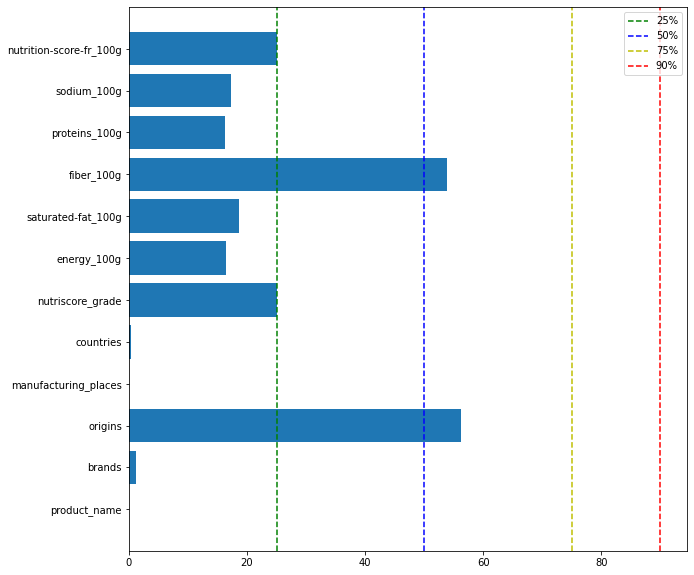

In [16]:
x_null = []
y_col = []

for col in datas.columns:
    
    nb_null = datas[col].isnull().sum()
    perc_null = nb_null / length * 100

    x_null.append(perc_null)
    y_col.append(col)

tab = pd.DataFrame(y_col, columns=["y_col"])
tab["x_null"] = x_null

fig = plt.figure(figsize=(10,10))
plt.axvline(25, linestyle="--", color="g", label=f"25%")
plt.axvline(50, linestyle="--", color="b", label=f"50%")
plt.axvline(75, linestyle="--", color="y", label=f"75%")
plt.axvline(90, linestyle="--", color="r", label=f"90%")
plt.barh(tab["y_col"], tab["x_null"])
# tab.plot(x = "y_col", y = "x_null", kind= "barh", figsize=(10, 10))
plt.legend()
plt.show()


In [17]:
print(datas.countries.isnull().sum())
tentative = datas["countries"].copy()
print(tentative.isnull().sum())

324
324


In [18]:

datas["brands"] = datas["brands"].fillna("Inconnu")
datas["countries"] = datas["countries"].fillna("Inconnu")


In [19]:
tentative.isnull().sum()

324

In [20]:

# analyse préliminaire de origins
import matplotlib.pyplot as plt

length = len(datas.index)

nb_null = datas["origins"].isnull().sum()
perc_null = round(nb_null / length * 100, 2)
print(f"{perc_null}% soit {nb_null} / {length} valeurs nulles pour la variable 'origins'")

tab_tmp = datas["origins"]
tab_tmp = tab_tmp.dropna().reset_index(drop=True)
print(f"Il y a {len(tab_tmp.unique())} valeurs uniques")

57.02% soit 65418 / 114720 valeurs nulles pour la variable 'origins'
Il y a 8934 valeurs uniques


A première vue, je ne pense pas garder la variable "origins". En effet, l'analyse préliminaire ci-dessus indique qu'en moyenne chaque valeur unique de la variable sera utilisée plus de 7 fois pour combler les valeurs nulles

J'ai quand même envie de transformer mes données en valeurs numériques à partir de ce que va me retourner .value_counts().

Je pourrais calculer le nombre de classes et l'amplitude et en déduire le nombre de valeurs à l'intérieur qui seront le plus susceptibles d'être utilisées pour combler mes null. Je ferai aussi un histogramme pour avoir un visuel.

.value_counts() permet de trier les valeurs par nombre d'apparitions, ce qui biaisera mes résultats mais me donnera les valeurs ayant le plus de chance d'être utilisées pour ma complétion. Ou alors je garde les valeurs distribuées de manière aléatoire pour un résultat posiblement plus proche de la réalité

In [21]:
# aperçu des valeurs aléatoires et mise en forme
import numpy as np

tab_tmp = pd.DataFrame(tab_tmp)

unique_val = tab_tmp["origins"].unique()
unique_val_list = unique_val.tolist()
tab_tmp["num_transf"] = tab_tmp["origins"].apply(lambda x: unique_val_list.index(x))

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tab_tmp["encoded"] = le.fit_transform(tab_tmp["origins"])
tab_tmp[["origins", "encoded"]]


,origins,encoded
0,France,2375
1,Québec,5373
2,Québec,5373
3,France,2375
4,Québec,5373
...,...,...
49297,lait cru,7951
49298,France,2375
49299,cacahuètes enrobés et biscuits,7155
49300,France,2375


Nombre de classe:  17
L'amplitude de classe est: 525
classe modale:  (2101.882, 2627.353]
effectif de la classe modale= 12895


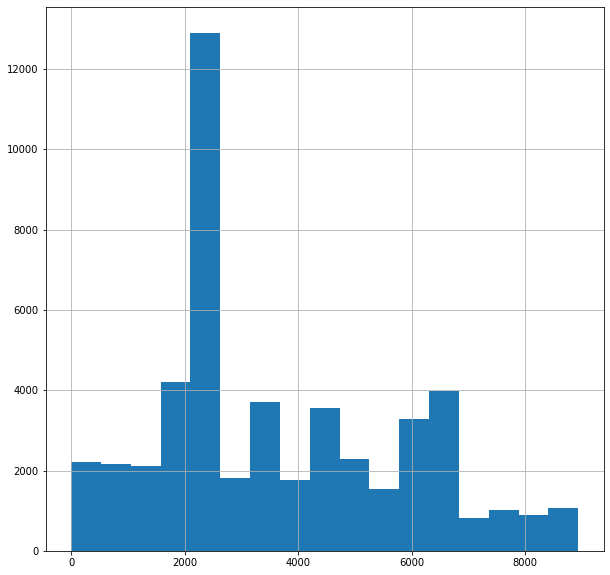

Histogramme affiné à 105 classes pour voir la répartition des éléments par lots d'environ 85
3 / 105 individus apparaissent moins de 100 fois
Soit 2.857 %
87 / 105 individus apparaissent moins de 500 fois
Soit 82.857 %
98 / 105 individus apparaissent moins de 1000 fois
Soit 93.333 %


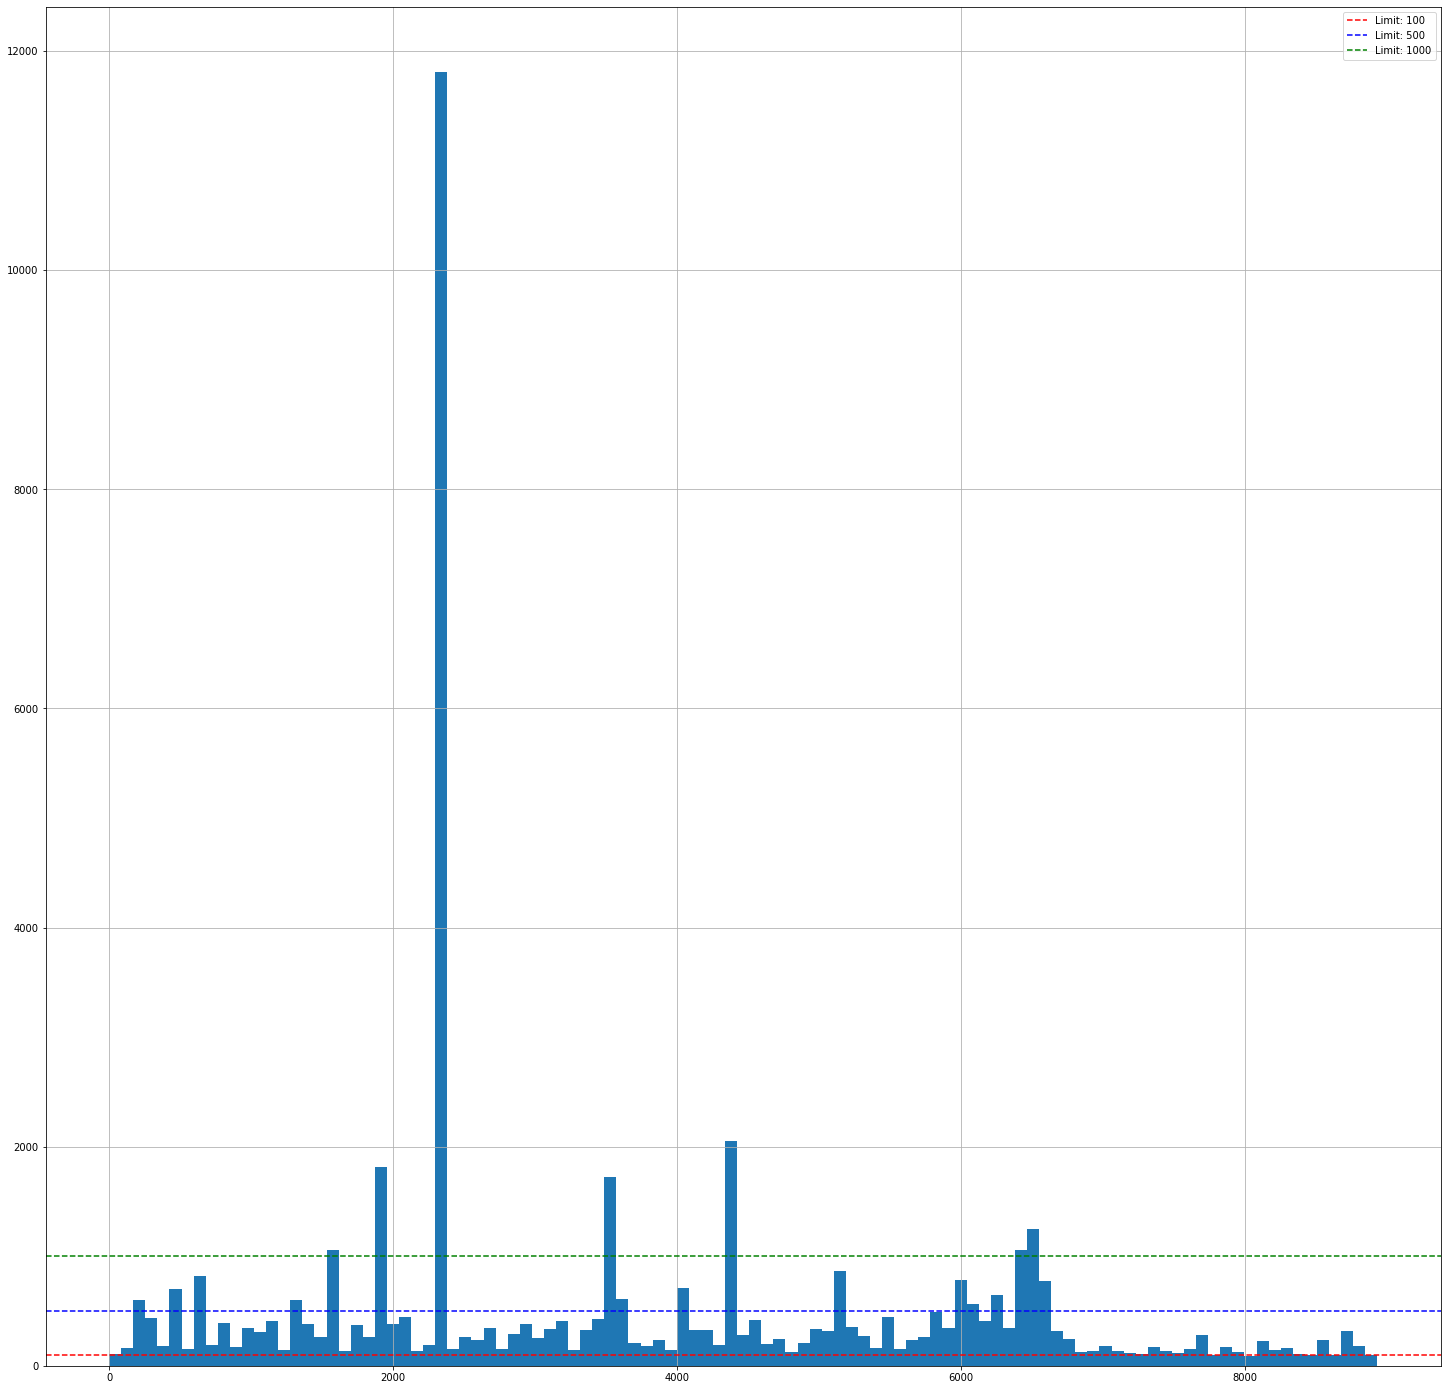

In [23]:
# analyse statistique des valeurs aléatoires
import math
import matplotlib.pyplot as plt

colonne = "encoded" # "num_transf"

nb_classes = round(1 + math.log2(len(tab_tmp)))
print("Nombre de classe: ", nb_classes)
ampl_classes = round((tab_tmp[colonne].max() - tab_tmp[colonne].min()) / nb_classes)
print(f"L'amplitude de classe est: {ampl_classes}")

bins = pd.cut(tab_tmp[colonne], nb_classes)
mode = bins.mode()
print("classe modale: ", mode[0])

compte_classes = tab_tmp.groupby(bins)[colonne].agg(['count'])
effectif_modal = compte_classes.loc[mode[0]]["count"]
print("effectif de la classe modale=", effectif_modal)

tab_tmp[colonne].hist(bins=nb_classes, figsize=(10, 10))
plt.show()

qty_classes = 105
print(f"Histogramme affiné à {qty_classes} classes pour voir la répartition des éléments par lots d'environ 85")
bins = pd.cut(tab_tmp[colonne], qty_classes)

compte_classes = tab_tmp.groupby(bins)[colonne].agg(['count'])
for i in [100, 500, 1000]:
    nb_inf =len([x for x in compte_classes["count"] if x <= i])
    percentage = round(nb_inf / qty_classes * 100, 3)
    print(f"{nb_inf} / {qty_classes} individus apparaissent moins de {i} fois")
    print(f"Soit {percentage} %")

tab_tmp[colonne].hist(bins=qty_classes, figsize=(25, 25))
plt.axhline(100, linestyle="--" , color="r" , label=f"Limit: 100")
plt.axhline(500, linestyle="--" , color="b" , label=f"Limit: 500")
plt.axhline(1000, linestyle="--" , color="g" , label=f"Limit: 1000")
plt.legend()
plt.show()


In [24]:
non_null = datas["origins"].notna().sum()
perc_val = effectif_modal / non_null * 100
print(f"{perc_val}% soit {effectif_modal} / {non_null} valeurs non nulles sont contenues dans {ampl_classes} entrées uniques")
dist_pot = round(perc_val * nb_null / 100)
print(f"Ces {ampl_classes} entrées rempliront potentiellement {dist_pot} / {nb_null} valeurs manquantes")
ratio = nb_null / ampl_classes
print(f"Ce qui nous amène à une moyenne de {ratio} apparition de chaque entrée lors de la complétion")

26.155125552715912% soit 12895 / 49302 valeurs non nulles sont contenues dans 525 entrées uniques
Ces 525 entrées rempliront potentiellement 17110 / 65418 valeurs manquantes
Ce qui nous amène à une moyenne de 124.60571428571428 apparition de chaque entrée lors de la complétion


D'après les résultats, j'en conclue que les nom les plus présents sont les 525 premiers de la liste unique_val

C'est très peu pour avoir une complétion cohérente à mes yeux

Nombre de classe:  14
L'amplitude de classe est: 828
classe modale:  (-10.585, 828.5]
Effectif par classe:
                    count
origins                  
(-10.585, 828.5]     8930
(828.5, 1656.0]         2
(1656.0, 2483.5]        1
(2483.5, 3311.0]        0
(3311.0, 4138.5]        0
(4138.5, 4966.0]        0
(4966.0, 5793.5]        0
(5793.5, 6621.0]        0
(6621.0, 7448.5]        0
(7448.5, 8276.0]        0
(8276.0, 9103.5]        0
(9103.5, 9931.0]        0
(9931.0, 10758.5]       0
(10758.5, 11586.0]      1
effectif de la classe modale= 8930


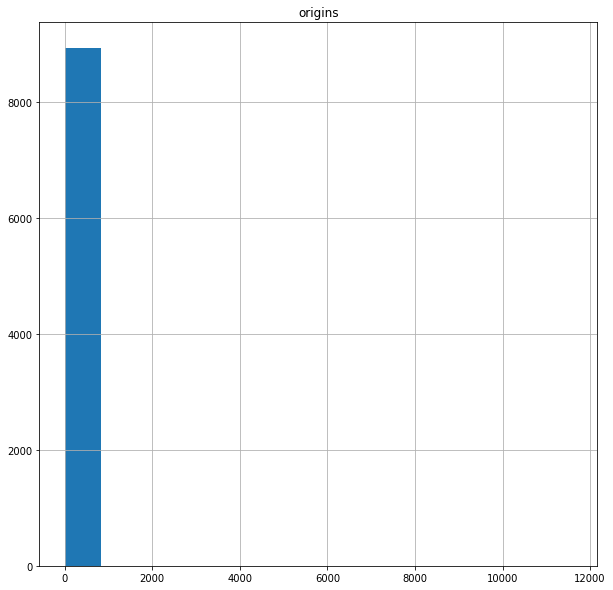

Histogramme affiné à 166 classes pour voir la répartition de l'apparition des éléments par pas de 5


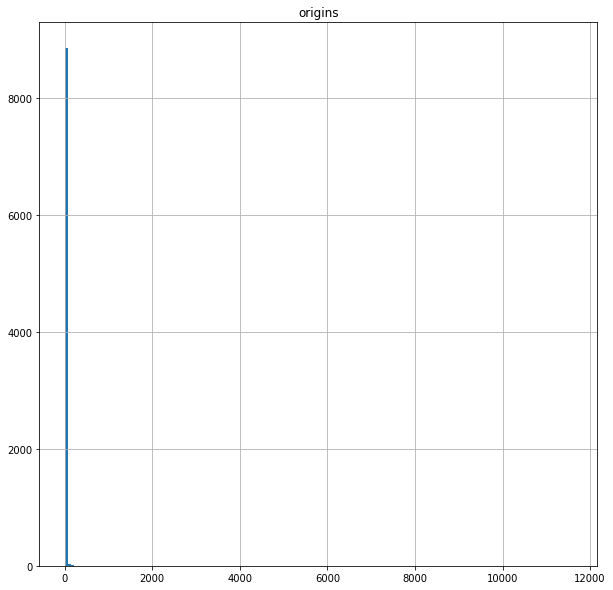

In [25]:
# analyse statistique des valeurs retrounées par .value_counts()
effectifs = tab_tmp["origins"].value_counts()
tab_tmp2 = pd.DataFrame(effectifs).reset_index()
colonne2 = "origins"

nb_classes2 = round(1 + math.log2(len(tab_tmp2)))
print("Nombre de classe: ", nb_classes2)
ampl_classes2 = round((tab_tmp2[colonne2].max() - tab_tmp2[colonne2].min()) / nb_classes2)
print(f"L'amplitude de classe est: {ampl_classes2}")

bins2 = pd.cut(tab_tmp2[colonne2], nb_classes2)
mode2 = bins2.mode()
print("classe modale: ", mode2[0])

compte_classes2 = tab_tmp2.groupby(bins2)[colonne2].agg(['count'])
print(f"Effectif par classe:\n{compte_classes2}")
effectif_modal2 = compte_classes2.loc[mode2[0]]["count"]
print("effectif de la classe modale=", effectif_modal2)

tab_tmp2.hist(bins=nb_classes2, figsize=(10, 10))
plt.show()

print(f"Histogramme affiné à 166 classes pour voir la répartition de l'apparition des éléments par pas de 5")
tab_tmp2.hist(bins=166, figsize=(10, 10))
plt.show()


Pour cette deuxième analyse, je vois que 8930/8934 éléments uniques apparaissent entre 0 et 828 fois

Je vais effectuer un test chi2 entre mes variables "brands", "manufacturing_places,"countries" et "origines" pour voir les corrélations et éventuellement déterminer un algo de ML pour compléter "origines"

In [26]:

def test_chi2(datas, cols, cible):
    import scipy.stats as st
    
    for col in cols:
        cont = datas[[col,cible]].pivot_table(index=col, columns=cible ,aggfunc=len ,margins=True ,margins_name="Total")
        c = cont.fillna(0)
        
        print(f"Test Chi2 entre {col} et {cible}:")
        st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(c.iloc[:-1,:-1])
        critical = st.chi2.ppf(0.95, st_dof)
        if np.abs(st_chi2) >= critical:
            print(f"Dépendante (Rejete H0); Khi2: {st_chi2} >= {critical} :critical")
        else:
            print(f"Indépendante (H0 OK); Khi2: {st_chi2} < {critical} :critical")
        alpha = 0.05
        if st_p <= alpha:
            print(f"Dépendante (Rejete H0); P-value: {st_p} <= {alpha} :alpha")
        else:
            print(f"Indépendante (H0 OK); P-value: {st_p} > {alpha} :alpha")
        print("\n")


In [27]:

import gc
from dask.distributed import Client
import joblib

client = Client(memory_limit="4GB", processes=False, n_workers=2, threads_per_worker=4, silence_logs="error")
# client.run(gc.collect)

cols = ["brands", "manufacturing_places", "countries"]

with joblib.parallel_backend("dask"):
    test_chi2(datas, cols, "origins")


Test Chi2 entre brands et origins:
Dépendante (Rejete H0); Khi2: 229205940.0375696 >= 193190589.63012585 :critical
Dépendante (Rejete H0); P-value: 0.0 <= 0.05 :alpha


Test Chi2 entre manufacturing_places et origins:
Dépendante (Rejete H0); Khi2: 207070212.56176704 >= 124471573.82062656 :critical
Dépendante (Rejete H0); P-value: 0.0 <= 0.05 :alpha


Test Chi2 entre countries et origins:
Dépendante (Rejete H0); Khi2: 33698458.52561387 >= 22799188.563849024 :critical
Dépendante (Rejete H0); P-value: 0.0 <= 0.05 :alpha




Les variables sont bien corrélée avec origins

Je vais effectuer un KNN Classifier pour combler les valeur de origins

In [40]:
tentative.isnull().sum()
df_KNN

,brands,manufacturing_places,countries,origins
0,11034.0,22867.0,4307.0,NaN
1,23966.0,8561.0,1755.0,NaN
2,6993.0,8561.0,1755.0,2375.0
3,16225.0,4754.0,1211.0,5373.0
4,16225.0,4754.0,1211.0,5373.0
...,...,...,...,...
114715,38298.0,24812.0,1755.0,NaN
114716,27040.0,2648.0,4307.0,1889.0
114717,39744.0,23358.0,1755.0,NaN
114718,38787.0,11358.0,1755.0,NaN


In [42]:

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

datas_KNN = datas[["brands", "manufacturing_places", "countries", "origins"]]
datas_other = datas[[x for x in datas.columns if x not in ["brands", "manufacturing_places", "countries", "origins"]]]

# le = LabelEncoder()
enc = OrdinalEncoder()
with joblib.parallel_backend("dask"):
    # df_KNN = datas_KNN.apply(lambda series:
    #     pd.Series(le.fit_transform(series[series.notnull()]),
    #     index=series[series.notnull()].index))
    tmp_datas = datas_KNN
    pos = tmp_datas.index[tmp_datas["origins"].isnull()]
    pos_t = tentative.index[tentative.isnull()]
    # tentative.index[tentative.isnull() == True]
    # print(pos_t)
    # tmp_datas["origins"] = tmp_datas["origins"].mask(tmp_datas.origins.isnull()).factorize()[0]
    tmp_datas.loc[tmp_datas.origins.isnull(), "origins"] = "azerty"

    df_KNN = pd.DataFrame(enc.fit_transform(tmp_datas), 
        columns=["brands", "manufacturing_places", "countries", "origins"])
    df_KNN.loc[df_KNN["origins"] == df_KNN.loc[pos[0], "origins"], "origins"] = np.nan


X_KNN = df_KNN[df_KNN["origins"].notnull() == True]
Y_KNN = df_KNN[df_KNN["origins"].isnull() == True]

df_KNN[df_KNN[["brands", "manufacturing_places", "countries", "origins"]].values < 0]


C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\nanar\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,brands,manufacturing_places,countries,origins


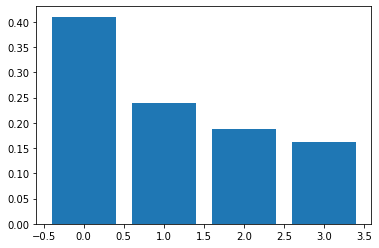

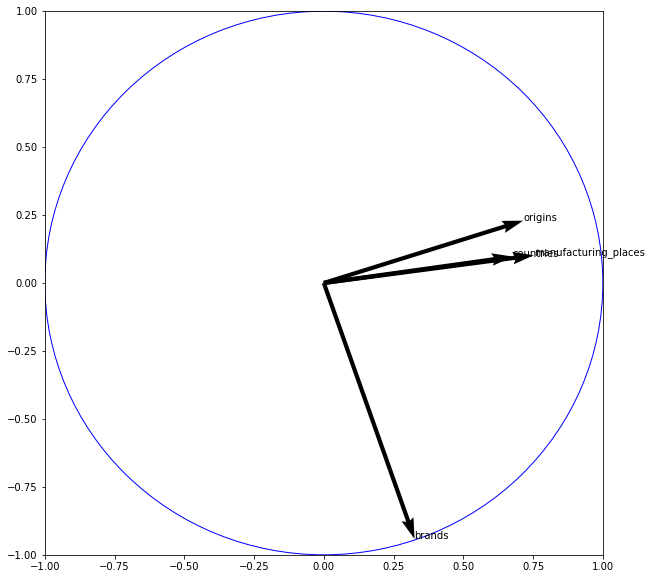

In [30]:
import prince

X = df_KNN[df_KNN["origins"].isnull() == False]

pca = prince.PCA(n_components=6, rescale_with_std=True, rescale_with_mean=True, copy=True, engine="auto", random_state=42)
pca = pca.fit(X)
pca.transform(X)

inertia = pca.explained_inertia_
plt.bar([x for x in range(len(inertia))], inertia)
plt.show()

correl = pca.column_correlations(X)

fig, ax = plt.subplots(figsize=(10,10))
plt.quiver(np.zeros(correl.shape[0]), np.zeros(correl.shape[0]), correl[0], correl[1], angles='xy', scale_units='xy', scale=1,)
for i, nom in enumerate(correl.index):
    plt.text(correl.iloc[i,0], correl.iloc[i,1], nom)
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.show()


In [31]:
correl[0]

brands                  0.325142
countries               0.677131
manufacturing_places    0.752194
origins                 0.714603
Name: 0, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cible = "origins"
colonnes = ["manufacturing_places", "countries"]

# X_scal = pd.DataFrame(StandardScaler().fit_transform(X_KNN), columns=X_KNN.columns)
# xtrain, xtest, ytrain, ytest = train_test_split(X_scal[colonnes], X_scal[cible], train_size=0.8)

xtrain, xtest, ytrain, ytest = train_test_split(X_KNN[colonnes], X_KNN[cible], train_size=0.8)

In [49]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

rmse = lambda y, yhat: np.sqrt(mean_squared_error(y, yhat))
rmsle = lambda y, yhat: np.sqrt(mean_squared_log_error(y, yhat))

R2: le nombre de neighbors optimal est 35 à 76.95628762029655%


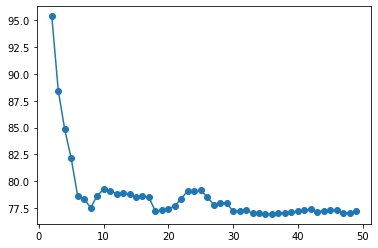

RMSE: le nombre de neighbors optimal est 35 à 1881.1882815222023%


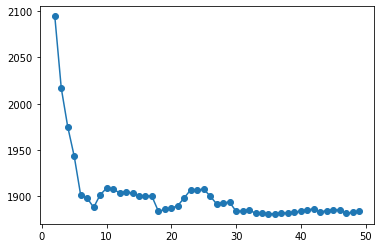

RMSLE: le nombre de neighbors optimal est 8 à 0.717481009016421%


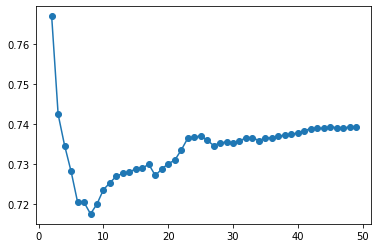

In [50]:
from sklearn import neighbors

with joblib.parallel_backend("dask"):
    errors = []
    r2 = []
    r3 = []
    for k in range(2,50):
        knn = neighbors.KNeighborsRegressor(k)
        knn.fit(xtrain, ytrain)
        pred = knn.predict(xtest)

        errors.append(100*(1 - knn.score(xtest, ytest)))
        
        r2.append(rmse(ytest, pred))
        r3.append(rmsle(ytest, pred))

    k = errors.index(min(errors)) +2
    print(f"R2: le nombre de neighbors optimal est {k} à {min(errors)}%")
    plt.plot(range(2,50), errors, 'o-')
    plt.show()

    k = r2.index(min(r2)) +2
    print(f"RMSE: le nombre de neighbors optimal est {k} à {min(r2)}%")
    plt.plot(range(2,50), r2, 'o-')
    plt.show()

    k = r3.index(min(r3)) +2
    print(f"RMSLE: le nombre de neighbors optimal est {k} à {min(r3)}%")
    plt.plot(range(2,50), r3, 'o-')
    plt.show()


Le score du meilleur KNN est d'environ 5% plus bas avec un encodage des données par OrdinalEncoder par rapport à un encodage avec LabelEncoder

In [51]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge

N_SPLITS = 5
regressor = RandomForestRegressor(random_state=0)

def get_scores_for_imputer(imputer, X_missing, y_missing):
    estimator = make_pipeline(imputer, regressor)
    print("Starting cross validation")
    impute_scores = cross_val_score(estimator, X_missing, y_missing,
                                    scoring= "r2", # "r2", # 'neg_mean_squared_error',
                                    cv=N_SPLITS)
    print(f"impute scores : {impute_scores}")
    return impute_scores

def get_impute_knn_score(X_missing, y_missing):
    imputer = KNNImputer(missing_values=np.nan, add_indicator=True)
    knn_impute_scores = get_scores_for_imputer(imputer, X_missing, y_missing)
    return knn_impute_scores.mean(), knn_impute_scores.std()

def get_impute_iterative(X_missing, y_missing):
    imputer = IterativeImputer(missing_values=np.nan, add_indicator=True,
                               random_state=0, n_nearest_features=5,
                               sample_posterior=True)
    iterative_impute_scores = get_scores_for_imputer(imputer,
                                                     X_missing,
                                                     y_missing)
    return iterative_impute_scores.mean(), iterative_impute_scores.std()

In [54]:

a= ["origins", "countries"]
b= "manufacturing_places"

samples = np.random.choice(len(df_KNN), int(len(df_KNN)*0.2), replace=False)
X_sc = df_KNN.loc[samples, a].values
Y_sc = df_KNN.loc[samples, b].values

# print(X_sc, "\n", Y_sc)
countries_tmp = pd.DataFrame(df_KNN["countries"])
countries_tmp.loc[df_KNN["countries"] == df_KNN.loc[pos_t[0], "countries"], "countries"] = np.nan
datas_test = df_KNN.loc[samples, ["origins", "manufacturing_places"]]
datas_test["countries"] = countries_tmp.iloc[samples]
# datas_test[datas_test.countries.isnull()]


['origins', 'manufacturing_places', 'countries', 'indicator_origins', 'indicator_countries']
KNNImputer, weight => uniform
R2: le nombre de neighbors optimal est 24 à 76.31074122747535%


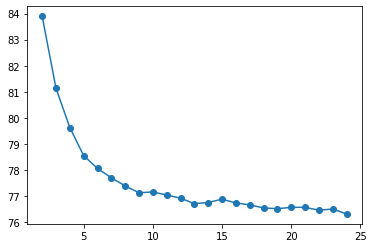

RMSE: le nombre de neighbors optimal est 24 à %5560.546035852783


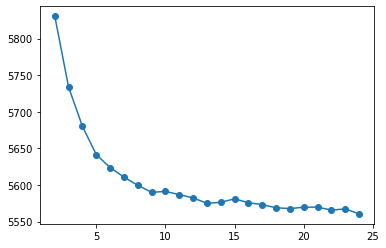

RMSLE: le nombre de neighbors optimal est 9 à %0.6595098003354657


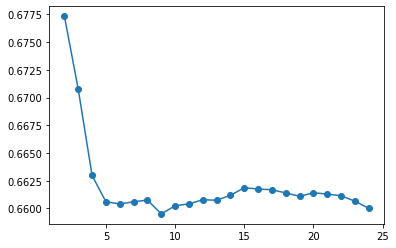

KNNImputer, weight => distance
R2: le nombre de neighbors optimal est 24 à 76.97086273277904%


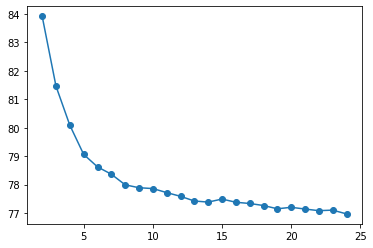

RMSE: le nombre de neighbors optimal est 24 à %5584.544833112305


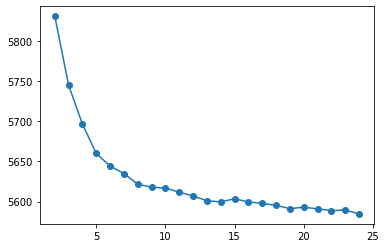

RMSLE: le nombre de neighbors optimal est 24 à %0.6598956971086701


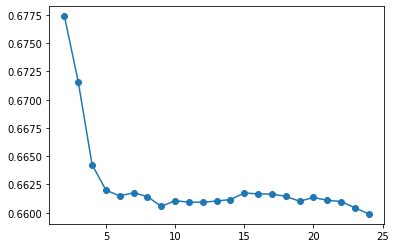

In [58]:

with joblib.parallel_backend("dask"):
    # moy, ect = get_impute_knn_score(X_sc, Y_sc)
    # print(f"KNNImputer\nScore : {moy}\nStd : {ect}")
    n_neighb = 0
    weight = ""
    boolean = True
    max_r2_KNN = 0
    KNN_cols = datas_test.columns.to_list()
    KNN_cols.append("indicator_origins")
    KNN_cols.append("indicator_countries")
    print(KNN_cols)
    
    for w in ["uniform", "distance"]:
        r2 = []
        errors = []
        r3 = []
        print(f"KNNImputer, weight => {w}")
        for k in range(2, 52):
            imp = KNNImputer(n_neighbors=k, weights=w, missing_values=np.nan, add_indicator=True)

            # print("Start imputation")
            
            result_datas = pd.DataFrame(np.round(imp.fit_transform(datas_test)), columns=KNN_cols)
            # X = result_datas.drop("manufacturing_places", axis=1)
            # Y = result_datas["manufacturing_places"]

            # X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

            # X_scaled = pd.DataFrame(StandardScaler().fit_transform(result_datas), columns=result_datas.columns)
            X_scaled = pd.DataFrame(result_datas, columns=result_datas.columns)
            X = X_scaled.drop("manufacturing_places", axis=1)
            Y = X_scaled["manufacturing_places"]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
            # X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

            lr = LinearRegression().fit(X_train, y_train)
            pred = lr.predict(X_test)
            
            r2.append(rmse(y_test, pred))
            errors.append(100*(1 - lr.score(X_test, y_test)))
            r3.append(rmsle(y_test, pred))

        k = errors.index(min(errors)) +2
        print(f"R2: le nombre de neighbors optimal est {k} à {min(errors)}%")
        plt.plot(range(2,52), errors, 'o-')
        plt.show()

        k = r2.index(min(r2)) +2
        print(f"RMSE: le nombre de neighbors optimal est {k} à %{min(r2)}")
        plt.plot(range(2,52), r2, 'o-')
        plt.show()

        k = r3.index(min(r3)) +2
        print(f"RMSLE: le nombre de neighbors optimal est {k} à %{min(r3)}")
        plt.plot(range(2,52), r3, 'o-')
        plt.show()

        if boolean:
            n_neighb = k
            weight = w
            boolean = False
            max_r2_KNN = min(r2)
        else:
            if max_r2_KNN > min(r2):
                n_neighb = k
                weight = w
                max_r2_KNN = max(r2)


In [59]:

print(f"KNNImputer results:\nBest neighbors: {n_neighb}\nWeights: {weight}\nScore (RMSE): {max_r2_KNN}")

KNNImputer results:
Best neighbors: 9
Weights: uniform
Score (RMSE): 5560.546035852783


R2: le nombre de neighbors optimal est 2 à 83.65538595467599%


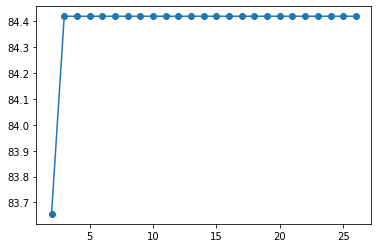

le nombre de neighbors optimal est 2 à %5821.991382071317


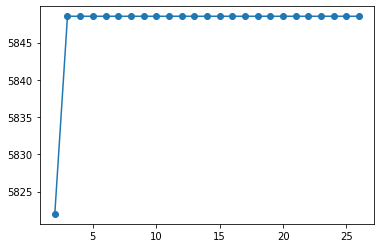

le nombre de neighbors optimal est 2 à %0.6753741694401164


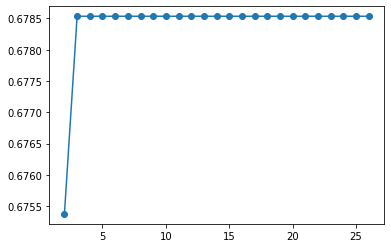

In [60]:

with joblib.parallel_backend("dask"):
    # moy, ect = get_impute_knn_score(X_sc, Y_sc)
    # print(f"KNNImputer\nScore : {moy}\nStd : {ect}")
    n_nearest = 0
    estimator = ""
    boolean = True
    max_r2_Iter = 0
    # KNN_cols = datas_test.columns.to_list()
    # KNN_cols.append("indicator")

    # dict_estimator = {"BayesianRidge": BayesianRidge(), "ExtraTreesRegressor": ExtraTreesRegressor()}

    # for name, estim in dict_estimator.items():
    r2 = []
    errors = []
    r3 = []
    # print(f"IterativeImputer, estimator => {name}")
    for k in range(2, 27):
        imp = IterativeImputer(missing_values=np.nan, add_indicator=True,
                        random_state=0, n_nearest_features=k, sample_posterior=True)

        result_datas = pd.DataFrame(np.round(imp.fit_transform(datas_test)), columns=KNN_cols)
        # X = result_datas.drop("manufacturing_places", axis=1)
        # Y = result_datas["manufacturing_places"]

        # X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

        # X_scaled = pd.DataFrame(StandardScaler().fit_transform(result_datas), columns=result_datas.columns)
        X_scaled = pd.DataFrame(result_datas, columns=result_datas.columns)
        X = X_scaled.drop("manufacturing_places", axis=1)
        Y = X_scaled["manufacturing_places"]
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
        # X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=42)

        lr = LinearRegression().fit(X_train, y_train)
        pred = lr.predict(X_test)
        
        r2.append(rmse(y_test, pred))
        errors.append(100*(1 - lr.score(X_test, y_test)))
        r3.append(rmsle(y_test, pred))

    k = errors.index(min(errors)) +2
    print(f"R2: le nombre de neighbors optimal est {k} à {min(errors)}%")
    plt.plot(range(2,27), errors, 'o-')
    plt.show()

    max_r2_Iter = min(r2)
    n_nearest = r2.index(min(r2)) +2
    print(f"le nombre de neighbors optimal est {n_nearest} à %{min(r2)}")
    plt.plot(range(2,27), r2, 'o-')
    plt.show()

    max_r2_Iter = min(r3)
    n_nearest = r3.index(min(r3)) +2
    print(f"le nombre de neighbors optimal est {n_nearest} à %{min(r3)}")
    plt.plot(range(2,27), r3, 'o-')
    plt.show()
    # if boolean:
    #     n_nearest = k
    #     estimator = name
    #     boolean = False
    #     max_r2_Iter = max(r2)
    # else:
    #     if max_r2_Iter < max(r2):
    #         n_nearest = k
    #         estimator = name
    #         max_r2_Iter = max(r2)


In [61]:
print(f"IterativeImputer results:\nBest nearest features: {n_nearest}\nScore (RMSE): {max_r2_Iter}")

IterativeImputer results:
Best nearest features: 2
Score (RMSE): 0.6753741694401164


Je choisis le KNNImputer pour imputer les valeurs manquantes de "origins"

In [ ]:

with joblib.parallel_backend("dask"):
    imp = KNNImputer(n_neighbors=n_neighb, weights=weight, missing_values=np.nan)
    
    resulting_datas = pd.DataFrame(np.round(imp.fit_transform(df_KNN[["manufacturing_places", "countries", "origins"]])), 
        columns=["manufacturing_places", "countries", "origins"])

In [ ]:
resulting_datas["brands"] = df_KNN.loc[:,"brands"]
# decoded_datas = 
copy = pd.DataFrame()
for col in ["brands", "manufacturing_places", "countries", "origins"]:
    copy[col] = resulting_datas[col]

decoded_datas = pd.DataFrame(enc.inverse_transform(copy), columns=["brands", "manufacturing_places", "countries", "origins"])
decoded_datas
# print(resulting_datas)
# print(df_KNN)
# decoded_datas
# for col in resulting_datas.columns:
#     print(f"{len(resulting_datas[col])} *** {col}")

In [ ]:
datas_final = pd.concat([decoded_datas, datas_other], axis=1)
datas_final.head(50)

In [ ]:
# datas_final.to_csv("PSante_04_app_products.csv", index=False, encoding="utf-8")